In [2]:
using LightGraphs, SimpleWeightedGraphs
using Plots, GraphRecipes
using LinearAlgebra, NamedArrays, StaticArrays
using Statistics
using ColorSchemes

In [3]:
function adjacencyMatrix(maps::Vararg{Pair}) 
    l = length(maps)
    names = [m.first for m in maps]
    O = NamedArray(zeros(l,l), ( names, names ), ("I", "O"))
    for m in maps
        O["I"=> m.first] = m.second ./ sum(m.second)
    end
    O
end

randAdjacency(n) = adjacencyMatrix((i => rand(n) for i in 1:n)...)
randAdjacency(T,n) = adjacencyMatrix((i => rand(T,n) for i in 1:n)...)

p(g::SimpleWeightedDiGraph) = normalize(eigen(Array(adjacency_matrix(g))').vectors[:,end],1) .|> abs
p(g::AbstractMatrix) = normalize(eigen(g').vectors[:,end],1) .|> abs

p (generic function with 2 methods)

In [4]:
function analisa(g,out=true)
    prob = p(g)
    trans = Diagonal(prob)*Array(g)
    if out
        println(round.(g^100, digits=3),'\n')


        round.(mean(g^100, dims=1), digits=3) |> println

        println('\n')
        round.(p(g), digits=3) |> println
        println('\n')

        round.((var(g^100, dims=1)), digits=3) |> println
    end
    graphplot(
            g,
            arrow=true,
            marker=:circle,
            node_weights=prob,
            edgewidth= g./maximum(g),
            markercolors=get(colorschemes[:vik],prob./maximum(prob)),
        ) # edgelabel=round.(adjacency_matrix(g),digits=1)
end

analisa (generic function with 2 methods)

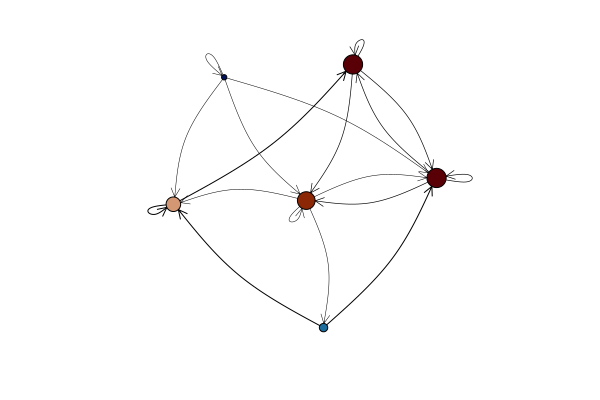

In [78]:
g = randAdjacency(Bool,6)

analisa(g,false)

3×3 Named Array{Float64,2}
I ╲ O │  :a   :b   :c
──────┼──────────────
:a    │ 0.0  1.0  0.0
:b    │ 0.0  0.0  1.0
:c    │ 1.0  0.0  0.0

1×3 Named Array{Float64,2}
  I ╲ O │    :a     :b     :c
────────┼────────────────────
mean(I) │ 0.333  0.333  0.333


[0.333, 0.333, 0.333]


1×3 Named Array{Float64,2}
 I ╲ O │    :a     :b     :c
───────┼────────────────────
var(I) │ 0.333  0.333  0.333


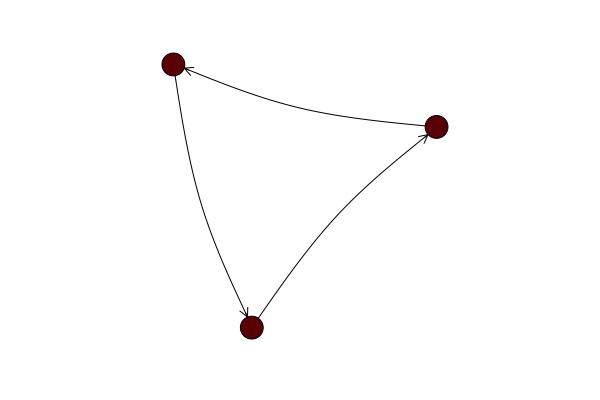

In [7]:
g = adjacencyMatrix(:a=>[0,1,0],:b=>[0,0,1],:c=>[1,0,0])

analisa(g)